In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
cropsnames=glob.glob("/home/prapan/Documents/images/test/*")

In [23]:
cropspics=[]
xsize=200
ysize=200
for name in cropsnames:
	pic=misc.imread(name)
	cropspics.append(misc.imresize(pic,(xsize,ysize)))

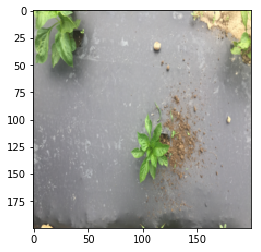

In [24]:
numofpics=len(cropspics)
allimages=np.empty(shape=[numofpics,xsize,ysize,3])
for i in range(numofpics):
	allimages[i]=cropspics[i].astype(dtype="float32")
allimages/=255
plt.imshow(allimages[4])
plt.show()

In [25]:
from sklearn.decomposition import PCA

In [26]:
def pca_transform(data, n_components, whiten):
    pca = PCA(n_components=n_components, whiten=whiten)
    pca.fit(data)
    return pca.fit_transform(data)

In [27]:
x_train = allimages.reshape((len(allimages), np.prod(allimages.shape[1:])))
print(x_train.shape)

(16, 120000)


In [28]:
X = x_train.reshape(-1, 3)
print(X.shape)

(640000, 3)


In [38]:
pca = PCA(n_components = 4)
pca.fit(x_train)
x_pca = pca.fit_transform(x_train)

In [39]:
x_inverse = pca.inverse_transform(x_pca)
print(x_inverse.shape)

(16, 120000)


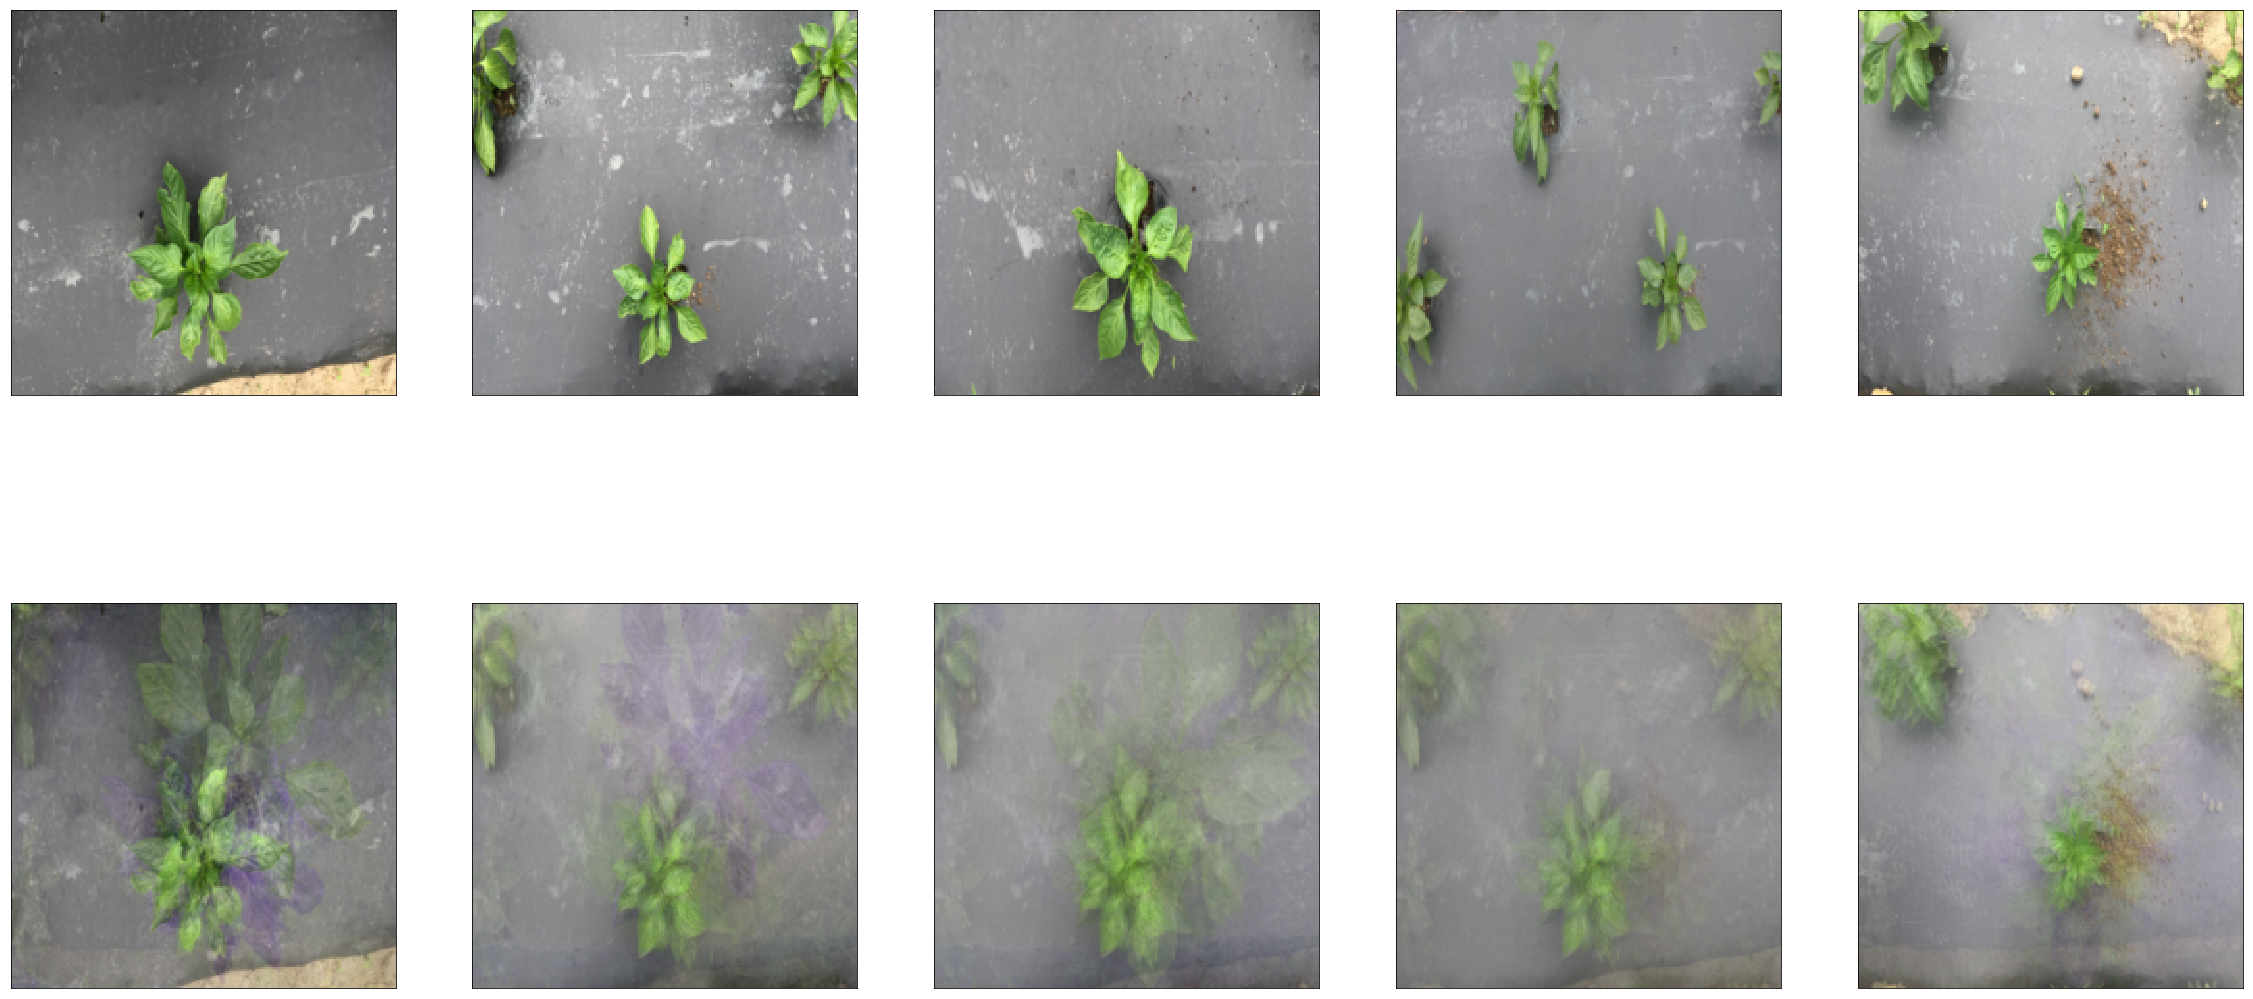

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 5  # how many digits we will display
plt.figure(figsize=(40, 20))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(200, 200,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_inverse[i].reshape(200, 200,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()